МІНІСТЕРСТВО ОСВІТИ І НАУКИ, МОЛОДІ ТА СПОРТУ УКРАЇНИ
НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ УКРАЇНИ
 «КИЇВСЬКИЙ ПОЛІТИХНІЧНИЙ ІНСТИТУТ ІМ.ІГОРЯ СІКОРСЬКОГО»
ФІЗИКО-ТЕХНІЧНИЙ ІНСТИТУТ


Лабораторна робота №7
«СТВОРЕННЯ І ВИКОРИСТАННЯ ТРИГЕРІВ»
Варіант 11





Виконав:                                                                     Студент 2 курсу
     Групи ФІ-21
Климентьєв Максим




Київ 2023

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# 1. Ознайомитись з теоретичними відомостями до лабораторної роботи.
# Дослідити кожне перетворення (перетворення, масштабування,
# поворот, відображення тощо) та їхні комбінації на площину.
# 2. Задати вершини довільного опуклого 8-кутника на площині. Зменшити
# його в 1,5 рази.
# 3. Отриманий результат з попереднього пункту симетрично відобразити
# відносно початку координат.
# 4. Задати похилу пряму двома точками на площині. Симетрично
# відобразити 8-кутник відносно даної прямої. Вказати перетворення, які
# для цього необхідні.
# 5. Розробити програмне забезпечення (середовище розробки та мова
# програмування за вибором студента) для виконання пунктів 2–4.
# Результат виконання кожного пункту показати в окремому графічному
# вікні.
# 6. Виконати пункти 2–4 для одного будь-якого графічного об’єкту, який
# подано в xlsx-файлі.

In [ ]:
### Zone for Task 5
#### 5
xy = pd.DataFrame.from_dict({"x": [1.5, 1, 1, 1.5, 2.5, 3, 3, 2.5, 1.5], "y": [1, 1.5, 2.5, 3, 3, 2.5, 1.5, 1, 1]})

In [ ]:
#### 5.0
plt.plot(xy['x'], xy['y'], 0, 0)#, scalex=False, scaley=False
plt.grid()
plt.title("5.0")
plt.show()

In [ ]:
#### 5.1
# xy_new = np.zeros_like(xy)
# for i in range(xy['x'].size):
#     # print(xy.values[i])
#     xy_new[i] = xy.values[i] * np.array([[0.5, 0], [0, 0.5]])
# plt.plot(xy_new['x'], xy_new['y'], 0, 0)#, scalex=False, scaley=False
# plt.grid()
# plt.title("5.1")
# plt.show()

In [3]:
### Zone for Task 6
xls = pd.read_excel("lab1/Варіанти.xlsx", "Var_02")

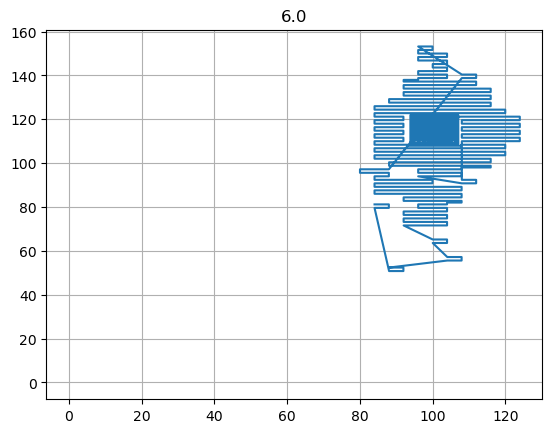

In [4]:
#### 6.0
plt.plot(xls["X"], xls["Y"], 0, 0)
plt.grid()
plt.title("6.0")
plt.show()